In [26]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import joblib

In [27]:
df = pd.read_csv("Computer_and_Mathematical_Occupations.csv")


In [28]:
print(df.head())

  O*NET-SOC Code  Task ID                                             Task_x  \
0     15-1211.00    20950  Troubleshoot program and system malfunctions t...   
1     15-1211.00    20950  Troubleshoot program and system malfunctions t...   
2     15-1211.00    20950  Troubleshoot program and system malfunctions t...   
3     15-1211.00    20950  Troubleshoot program and system malfunctions t...   
4     15-1211.00    20950  Troubleshoot program and system malfunctions t...   

   Scale Name  Data Value  Task_y  Task Type  Importance_x   Level_x  \
0           1        0.00    1910          1      3.137317  3.275366   
1           1        3.32    1910          1      3.137317  3.275366   
2           1       26.94    1910          1      3.137317  3.275366   
3           1       21.71    1910          1      3.137317  3.275366   
4           1       19.84    1910          1      3.137317  3.275366   

   Importance_y  ...  Importance     Level  Tech Readiness  Tool Dependency  \
0      

In [29]:
print(df.columns)

Index(['O*NET-SOC Code', 'Task ID', 'Task_x', 'Scale Name', 'Data Value',
       'Task_y', 'Task Type', 'Importance_x', 'Level_x', 'Importance_y',
       'Level_y', 'Importance', 'Level', 'Tech Readiness', 'Tool Dependency',
       'Context', 'Context (Categories 1-3)', 'Context (Categories 1-5)',
       'Title', 'Automatability', 'Category'],
      dtype='object')


In [30]:
df['Automatibility_Label'] = (df['Automatability'] >= 0.5113).astype(int)
print(df.head())

  O*NET-SOC Code  Task ID                                             Task_x  \
0     15-1211.00    20950  Troubleshoot program and system malfunctions t...   
1     15-1211.00    20950  Troubleshoot program and system malfunctions t...   
2     15-1211.00    20950  Troubleshoot program and system malfunctions t...   
3     15-1211.00    20950  Troubleshoot program and system malfunctions t...   
4     15-1211.00    20950  Troubleshoot program and system malfunctions t...   

   Scale Name  Data Value  Task_y  Task Type  Importance_x   Level_x  \
0           1        0.00    1910          1      3.137317  3.275366   
1           1        3.32    1910          1      3.137317  3.275366   
2           1       26.94    1910          1      3.137317  3.275366   
3           1       21.71    1910          1      3.137317  3.275366   
4           1       19.84    1910          1      3.137317  3.275366   

   Importance_y  ...     Level  Tech Readiness  Tool Dependency   Context  \
0      2.

In [31]:
df.drop(columns=['Automatability'], inplace=True)
df['Task Type'] = df['Task Type'] - 1 

In [32]:
label_encoder = LabelEncoder()
df['Scale Name'] = label_encoder.fit_transform(df['Scale Name'])
columns_to_drop = ["O*NET-SOC Code", "Task ID", "Task_x", "Title", "Category"]
df = df.drop(columns=columns_to_drop, errors='ignore')
df.fillna(df.mean(), inplace=True)

In [33]:
X = df.drop(columns=["Automatibility_Label"])
y = df["Automatibility_Label"]

In [34]:
# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Feature scaling (standardize features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [35]:
# Step 10: Perform cross-validation (5-fold cross-validation)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validation accuracy: 0.9984 ± 0.0009


In [43]:
# Step 11: Predict on the test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
joblib.dump(model, 'logreg_model.pkl') 

['logreg_model.pkl']

In [37]:
# Step 12: Evaluate the model with classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       890
           1       0.99      1.00      1.00       225

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115


Confusion Matrix:
[[888   2]
 [  0 225]]


In [38]:
# Step 13: ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


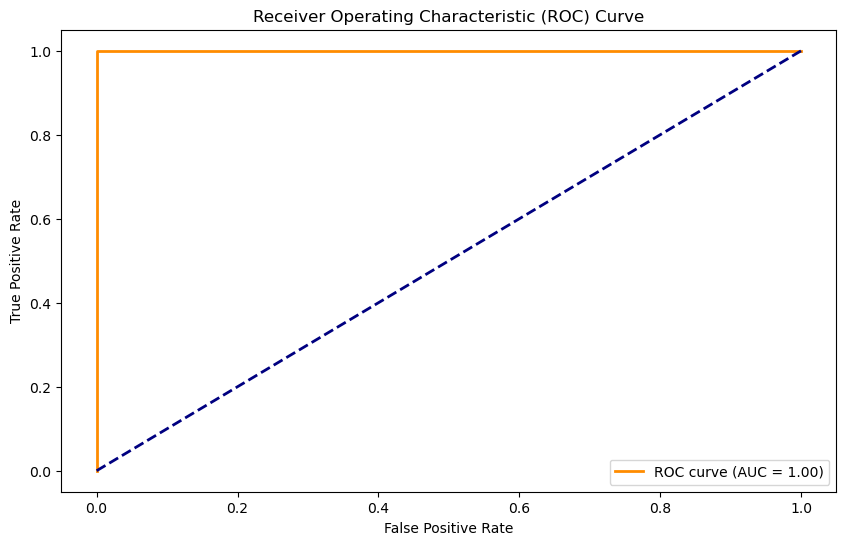

In [39]:
# Step 14: Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [40]:
# Print AUC score
print(f"AUC Score: {roc_auc:.4f}")

AUC Score: 1.0000


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9982
Precision: 0.9912
Recall: 1.0000
F1-Score: 0.9956
Confusion Matrix:
[[888   2]
 [  0 225]]
